<a href="https://colab.research.google.com/github/AnaClarice382/deep-learning/blob/main/classificacao_de_cogumelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
# from google.colab import files
# files.upload()         # expire any previous token(s) and upload recreated token


In [4]:
# !rm -r ~/.kaggle
# !mkdir ~/.kaggle
# !mv ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list


In [5]:
# !kaggle datasets download -d daniilonishchenko/mushrooms-images-classification-215

In [6]:
# !unzip /content/mushrooms-images-classification-215.zip

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import os
import random

Coisas a fazer:

* Aprender a mexer com imagem png
* Explorar os dados
* Separar o dataset em treino e teste
* Escolher alguns modelos para testar
* Treinar modelo
* Testar
* Explicar modelo (Parte dificil)

In [8]:
diretorio_base = '/content/data/data/'

In [9]:


percentual_teste = 0.3  # Porcentagem de dados para o conjunto de teste

conjunto_treinamento = []
conjunto_teste = []

# Percorre as pastas do diretório base
for pasta in os.listdir(diretorio_base):
    caminho_pasta = os.path.join(diretorio_base, pasta)
    if os.path.isdir(caminho_pasta):
        # Obtém os arquivos da pasta
        arquivos = os.listdir(caminho_pasta)

        random.shuffle(arquivos)

        # Divide os arquivos em treinamento e teste
        arquivos_treinamento, arquivos_teste = train_test_split(arquivos, test_size=percentual_teste, random_state=42)

        # Adiciona os caminhos completos aos conjuntos correspondentes
        caminhos_treinamento = [os.path.join(pasta, arquivo) for arquivo in arquivos_treinamento]
        caminhos_teste = [os.path.join(pasta, arquivo) for arquivo in arquivos_teste]

        conjunto_treinamento.extend(caminhos_treinamento)
        conjunto_teste.extend(caminhos_teste)


<_io.BufferedReader name='/content/data/data/sepia_bolete/13.png'>


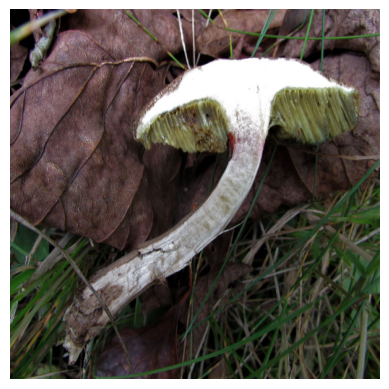

In [10]:
from pathlib import Path

for caminho_completo in conjunto_teste:
    with open(diretorio_base + caminho_completo, 'rb') as arquivo_imagem:
        print(arquivo_imagem)
        imagem = mpimg.imread(arquivo_imagem)

        # Exibe a imagem usando a função imshow() do matplotlib.pyplot
        plt.imshow(imagem)
        plt.axis('off')  # Desativa a exibição dos eixos
        plt.show()
        break

In [11]:
from pathlib import Path
import cv2

for caminho_completo in conjunto_teste:
    # Carregar a imagem
    imagem = cv2.imread(diretorio_base + caminho_completo)

    # Obter as dimensões da imagem
    altura, largura, _ = imagem.shape

    print("Largura:", largura)
    print("Altura:", altura)
    break


Largura: 512
Altura: 512


In [12]:
especies_train = []
especies = []
for i in conjunto_treinamento:
    diretorio = diretorio_base + i
    partes = diretorio.split("/")
    especie = partes[-2]
    especies.append(especie)
    especies_train.append((especie, diretorio))


In [13]:
len(especies_train)

2081

In [14]:
len(set(especies))

215

In [15]:
especies_test = []

for i in conjunto_teste:
    diretorio = diretorio_base + i
    partes = diretorio.split("/")
    especie = partes[-2]
    especies_test.append((especie, diretorio))


EDA

_ Cruzar com base para pegar informacoes da especie
    Ex: é comestivel? é venenoso, qual grau de periculosidade

    1 - Usar gpt para criar a base

    2 - base gpt vs base real

- Tamanho de cogumelo


Possiveis resultados:
    - Levar para tcc

    - Qual frequencia e onde é encontrado?

    - Detectar lugares com possivel incidencia de cogu (depende de clima, humidade)



# Tratamento de imagens

_ Redimensionamento
 - Usar PCA para redimensionar as imagens diminui a acuracia do modelo?
 _ Redimensionar vai depender da distancia da imagem?

_ Coloracao

_ Data augmentation (tlvz necessario para gerar mais dados)

_ Image segmentation
    - Tirar fundo? Manter fundo da imagens? (O fundo pode vir a atrapalhar)

# Modelagem

_ Testar modelo simples

_ Tunar parametros

_ Testar outras arquiteturas



In [16]:
# Lista de caminhos das imagens de treinamento
imagens_treinamento = [especie_train[1] for especie_train in especies_train]

# Lista das respectivas classes das imagens de treinamento
classes_treinamento = [especie_train[0] for especie_train in especies_train]


imagens_teste = [especie_test[1] for especie_test in especies_test]
classes_test = [especie_test[0] for especie_test in especies_test]

In [17]:
img_height = 512
img_width = 512
img_size = 512

### Normalizacao


In [18]:
def norm(data, x_train_mean, x_train_std):
  data_norm = (data - x_train_mean)/x_train_std
  return data_norm

In [19]:
from sklearn.preprocessing import LabelEncoder

# Carregar as imagens e pré-processá-las
imagens_processadas = []
for imagem_path in imagens_treinamento:
#     imagem = Image.open(imagem_path)
    # Realizar pré-processamento da imagem, se necessário
    # Por exemplo: redimensionar, normalizar, converter para array

#     imagem_processada = np.array(imagem)  # Converter a imagem em um array NumPy
    img_arr = cv2.imread(imagem_path)[...,::-1] #convert BGR to RGB format

    imagens_processadas.append(cv2.resize(img_arr, (img_size, img_size)))

# Converter a lista de imagens em um array NumPy
imagens_processadas = np.array(imagens_processadas)

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()
# Codificar as classes
classes_numericas = label_encoder.fit_transform(classes_treinamento)


In [20]:
imagens_processadas_test = []
for imagem_path in imagens_teste:

    img_arr = cv2.imread(imagem_path)[...,::-1] #convert BGR to RGB format
    imagens_processadas_test.append(cv2.resize(img_arr, (img_size, img_size)))

# Converter a lista de imagens em um array NumPy
imagens_processadas_test = np.array(imagens_processadas_test)

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()
# Codificar as classes
classes_numericas_test = label_encoder.fit_transform(classes_test)

In [21]:
img_height = 512
img_width = 512
channels = 3
num_classes=len(set(especies))
X_train = imagens_processadas
y_train = classes_numericas
X_test = imagens_processadas_test
y_test = classes_numericas_test

In [22]:
y_test = np.asarray(y_test).astype('int').reshape((-1,1))

In [23]:
y_train = np.asarray(y_train).astype('int').reshape((-1,1))

In [24]:
X_train.shape

(2081, 512, 512, 3)

In [25]:
X_train.shape

(2081, 512, 512, 3)

In [26]:
y_test.shape

(1041, 1)

In [27]:
X_test.shape

(1041, 512, 512, 3)

In [28]:
y_test

array([[153],
       [153],
       [153],
       ...,
       [116],
       [116],
       [116]])

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# Carregar o conjunto de dados
# Certifique-se de ter seus dados de treinamento e teste prontos
# X_train, y_train: dados de treinamento
# X_test, y_test: dados de teste
# Certifique-se de que as imagens estejam pré-processadas adequadamente

# Definir a arquitetura do modelo
model = keras.Sequential([
    layers.Normalization(input_shape=(img_height, img_width, channels)),
    layers.Conv2D(16, kernel_size=(7,7), input_shape=(img_height, img_width, channels)),
    layers.MaxPool2D(),
    layers.Conv2D(6, kernel_size=(5,5), input_shape=(img_height, img_width, channels)),
    layers.MaxPool2D(),
    layers.Conv2D(3, kernel_size=(3,3), input_shape=(img_height, img_width, channels)),
    layers.Flatten(),
    layers.Dense(units=num_classes, activation="softmax")
])

# Compilar o modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 512, 512, 3)      7         
 ion)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 506, 506, 16)      2368      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 253, 253, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 249, 249, 6)       2406      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 124, 124, 6)      0         
 g2D)                                                            
                                                      

https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Loss:", test_loss)
print("Accuracy:", test_accuracy)


# Fazer previsões
predictions = model.predict(X_test)

# A partir das previsões, você pode interpretar os resultados conforme necessário

Epoch 1/10
66/66 [==============================] - 1099s 17s/step - loss: 910.2179 - accuracy: 0.0111 - val_loss: 1020.6691 - val_accuracy: 0.0067
Epoch 2/10
66/66 [==============================] - 1090s 16s/step - loss: 89.4671 - accuracy: 0.7804 - val_loss: 133.7641 - val_accuracy: 0.0144
Epoch 3/10
18/66 [=======>......................] - ETA: 11:44 - loss: 0.5490 - accuracy: 0.9826